<a href="https://colab.research.google.com/github/heshannana/HIT-140/blob/Heshan-Changes/HIT_140_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as skl_lm

## Exploratory Data Analysis

In [ ]:
data = pd.read_csv("/content/fairfield_data.csv", sep = ",", encoding="ISO-8859-1")

In [ ]:
data.shape

(122, 12)

In [ ]:
data.isna().sum()

Reservoir        0
Fish             0
Mercury          0
Elevation        0
Drainage Area    3
Surface Area     0
Max Depth        1
RF               7
FR               7
Dam              3
RT               1
RS               2
dtype: int64

In [ ]:
data.dtypes

Reservoir         object
Fish               int64
Mercury          float64
Elevation          int64
Drainage Area    float64
Surface Area       int64
Max Depth        float64
RF               float64
FR               float64
Dam              float64
RT               float64
RS               float64
dtype: object

In [ ]:
data = data.fillna(data.mean())
data.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Reservoir        0
Fish             0
Mercury          0
Elevation        0
Drainage Area    0
Surface Area     0
Max Depth        0
RF               0
FR               0
Dam              0
RT               0
RS               0
dtype: int64

In [ ]:
data['Reservoir'].unique()

array(['Abilene', 'Abraham Lake', 'Academy', 'Acadia', 'Acadia Valley',
       'Acheson', 'Acme', 'Adair Creek', 'Adams Creek', 'Bangs Lake',
       'Bank Bay', 'Bank Creek', 'Bankfoot Creek', 'Bankhead', 'Bankview',
       'Bannerman', 'Barnegat', 'Barnes Ridge', 'Barnett Lake',
       'Barnwell', 'Fork Lake', 'Fort Creek', 'Fox Creek', 'Gadois Lake',
       'Gap Creek', 'Gardiner Creek', 'Geikie Lake', 'Geraldine Lakes',
       'Gerard Creek', 'Gertrude Lake', 'Giants Mirror', 'Halach',
       'Halcreek', 'Halfway Creek', 'Halifax Coulee', 'Hamilton Hill',
       'Hamptons', 'Ice Water Creek', 'Junction Creek', 'Jutland Brook',
       'Kakina Lake', 'Kakut Creek', 'Kamisak Lake', 'Katchemut Creek',
       'Kaufmann Creek', 'Keane Creek', 'Keith Lake', 'Owl Lake',
       'Owlseye Lake', 'Oxbow Lake', 'Oxley Creek', 'Pair Lakes',
       'Pans Lake', 'Paradise Basin', 'Paradise Creek', 'Parker Lake',
       'Parlby Lake', 'Parsons Creek', 'Partridge Lake', 'Pasque Creek',
       'Pastec

In [ ]:
data.head()

,Reservoir,Fish,Mercury,Elevation,Drainage Area,Surface Area,Max Depth,RF,FR,Dam,RT,RS
0,Abilene,3,0.053,196,6.0,74,36.0,0.44,1.1,1.0,2.0,0.0
1,Abraham Lake,4,0.350,345,15.0,360,80.0,0.51,1.7,0.0,3.0,1.0
2,Academy,5,0.540,487,1.0,175,10.0,0.57,1.5,0.0,3.0,0.0
3,Acadia,5,0.290,165,131.0,5543,100.0,0.51,1.1,0.0,2.0,1.0
4,Acadia Valley,5,0.910,1273,65.0,700,106.0,0.62,4.3,0.0,1.0,1.0


In [ ]:
data = data.drop(['Reservoir'], axis = 1)
data.dtypes

Fish               int64
Mercury          float64
Elevation          int64
Drainage Area    float64
Surface Area       int64
Max Depth        float64
RF               float64
FR               float64
Dam              float64
RT               float64
RS               float64
dtype: object

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Fish,Mercury,Elevation,Drainage Area,Surface Area,Max Depth,RF,FR,Dam,RT,RS
Fish,1.000000,0.081670,-0.063021,-0.000292,-0.048742,-0.115798,-0.013176,-0.159229,-0.014626,0.147731,-0.126572
Mercury,0.081670,1.000000,-0.254471,-0.040958,-0.046194,-0.067790,-0.067978,-0.065539,-0.106179,-0.010882,0.097639
Elevation,-0.063021,-0.254471,1.000000,0.076918,-0.080914,0.061466,0.212996,0.078223,0.223379,-0.198816,0.029109
Drainage Area,-0.000292,-0.040958,0.076918,1.000000,0.659250,0.282624,-0.049399,0.080757,-0.106427,-0.125306,-0.075024
Surface Area,-0.048742,-0.046194,-0.080914,0.659250,1.000000,0.378399,-0.019287,-0.095841,-0.249824,-0.178828,-0.051953
Max Depth,-0.115798,-0.067790,0.061466,0.282624,0.378399,1.000000,0.018216,-0.268447,-0.189783,-0.420850,0.563832
RF,-0.013176,-0.067978,0.212996,-0.049399,-0.019287,0.018216,1.000000,0.045905,-0.102369,-0.006838,-0.047814
FR,-0.159229,-0.065539,0.078223,0.080757,-0.095841,-0.268447,0.045905,1.000000,0.141810,-0.027763,-0.110585
Dam,-0.014626,-0.106179,0.223379,-0.106427,-0.249824,-0.189783,-0.102369,0.141810,1.000000,-0.002987,0.011529
RT,0.147731,-0.010882,-0.198816,-0.125306,-0.178828,-0.420850,-0.006838,-0.027763,-0.002987,1.000000,-0.228612


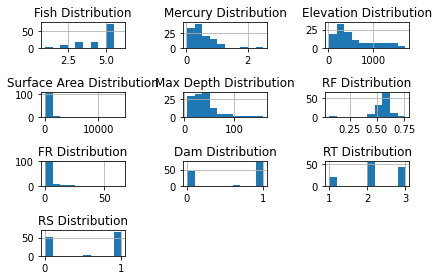

In [ ]:
# Check distirbutions of numerical columns
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
data_temp = data[["Fish", "Mercury", "Elevation", "Surface Area", "Max Depth", "RF", "FR", "Dam", "RT", "RS"]]
draw_histograms(data, data_temp.columns, 4, 3)

## Regression Modelling

In [ ]:
# Differentiate X and Y
X = data.drop(['Mercury'], axis = 1)
y = data['Mercury']

In [ ]:
# SPlit the dataset into training and testing sets, with a ratio of 70% and 30% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3,
                                                   random_state = 42)

In [ ]:
import statsmodels.api as sm

#add constant to predictor variables
x = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Mercury   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.397
Date:                Tue, 22 Nov 2022   Prob (F-statistic):              0.198
Time:                        13:41:46   Log-Likelihood:                -3.5105
No. Observations:                  85   AIC:                             29.02
Df Residuals:                      74   BIC:                             55.89
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7964      0.236      3.375

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lm = skl_lm.LinearRegression()
model = lm.fit(X_train, 
               y_train)

In [ ]:
loo = LeaveOneOut()
loo.get_n_splits(X_train)
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits = 10, 
                        random_state = 42,
                       shuffle = True)

scores = cross_val_score(model, 
                         X_train,
                         y_train,
                         scoring = "neg_mean_squared_error", 
                         cv = crossvalidation,
                         n_jobs = 1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 10, MSE: 0.08027855555635814, STD: 0.02598705356009562


## Testing

In [ ]:
pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
    
print(MSE)

0.22630147858802638
